# **Analysis of Handwritten Devnagari Character Recognition using Neural Networks and Classifiers**

## Import all necessary libraries

In [ ]:
import os
import time
import random
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers, losses, optimizers, metrics
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

from sklearn.svm import SVC
from sklearn import ensemble,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
%matplotlib inline

# 1.

## Load Image

In [ ]:
path = "./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Train_Full_Data"

folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]


for folder in folders:
    newPath = os.path.join(path, folder)
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = '-'.join(folderName.split("_")[2:])
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png']
    for image in imageList:
        im = Image.open(os.path.join(newPath, image))
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
print("Size of the image matrix = ",np.size(imageMatrix))

Size of the image matrix =  36864000


## Pre-processing

In [ ]:
# Convert matrix to array
a = np.array(imageMatrix)
print("Before Normalization 'a' : \n", a, a.shape)

a = a.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
print("After Normalization 'a' : \n", a, a.shape)


# Separate the features and labels of the images
# Define variables
n_samples = len(a)
# X = a.reshape((n_samples,-1))
X = a.reshape(a.shape[0], a.shape[1])
Y = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',Y.shape)
print(Y)


# Transform categorical variables using Onehot encoding
le=preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)
Y=to_categorical(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)
print('Train size = ',x_train.shape," ",y_train.shape)

img_height_rows = 32
img_width_cols = 32

im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

Before Normalization 'a' : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (36000, 1024)
After Normalization 'a' : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (36000, 1024)
Features size =  (36000, 1024)
Labels size =  (36000,)
['kha-ख' 'kha-ख' 'kha-ख' ... 'adna-ण' 'adna-ण' 'adna-ण']
Train size =  (28800, 1024)   (28800, 36)
(32, 32, 1)


In [ ]:
path = "./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Train_Full_Data"

## Model

In [ ]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'

# 11 layers

# L1
# ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation, name="L1Conv")
cnn.add(ip_conv_0)

# L2
# Add the next Convolutional+Activation layer
# ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_0_1 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation, name="L2Conv")
cnn.add(ip_conv_0_1)

# L3
# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L3MaxPool")
cnn.add(pool_0)

# L4
# ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation, name="L4Conv")
cnn.add(ip_conv_1)

# L5
# ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation, name="L5Conv")
cnn.add(ip_conv_1_1)

# L6
# pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L6MaxPool")
cnn.add(pool_1)

# L7
# ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_2 = Conv2D(filters=128, kernel_size=kernelSize, activation=ip_activation, name="L7Conv")
cnn.add(ip_conv_2)

# L8
# pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
pool_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L8MaxPool")
cnn.add(pool_2)

# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

# L9
flat_layer_0 = Flatten()
cnn.add(flat_layer_0)

# L10
# Now add the Dense layers
# h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
h_dense_0 = Dense(units=256, activation=ip_activation, kernel_initializer='uniform', name="L10Dense")
cnn.add(h_dense_0)

# L11
# Let's add one more before proceeding to the output layer
# h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
h_dense_1 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform', name="L11Dense")
cnn.add(h_dense_1)

# L12
n_classes = 36
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

opt = 'adam'
loss = 'categorical_crossentropy'
metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [ ]:
history = cnn.fit(x_train, y_train, batch_size=100, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
288/288 [==============================] - 100s 346ms/step - loss: 1.0948 - accuracy: 0.6718 - precision: 0.8477 - recall: 0.5603 - val_loss: 0.4683 - val_accuracy: 0.8525 - val_precision: 0.8975 - val_recall: 0.8174
Epoch 2/25
288/288 [==============================] - 103s 357ms/step - loss: 0.3668 - accuracy: 0.8849 - precision: 0.9171 - recall: 0.8568 - val_loss: 0.2658 - val_accuracy: 0.9171 - val_precision: 0.9412 - val_recall: 0.8988
Epoch 3/25
288/288 [==============================] - 100s 348ms/step - loss: 0.2200 - accuracy: 0.9297 - precision: 0.9456 - recall: 0.9158 - val_loss: 0.1875 - val_accuracy: 0.9413 - val_precision: 0.9526 - val_recall: 0.9318
Epoch 4/25
288/288 [==============================] - 100s 347ms/step - loss: 0.1488 - accuracy: 0.9520 - precision: 0.9606 - recall: 0.9443 - val_loss: 0.2234 - val_accuracy: 0.9299 - val_precision: 0.9404 - val_recall: 0.9211
Epoch 5/25
288/288 [==============================] - 99s 342ms/step - loss: 0.1154 - ac

In [ ]:
cnn.history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

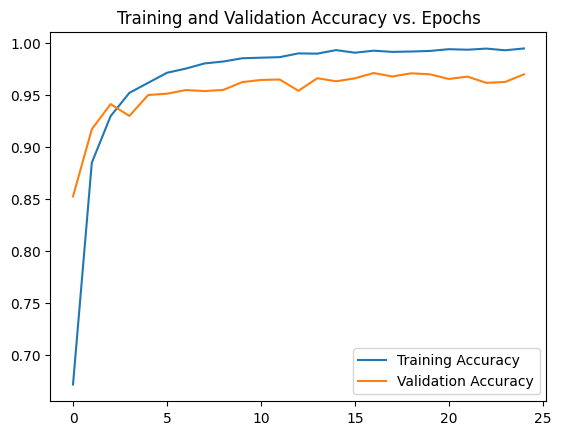

In [ ]:
# Plot the model accuracy over increasing epochs
plt.plot(cnn.history.history['accuracy'])
plt.plot(cnn.history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Training and Validation Accuracy vs. Epochs")
plt.show()

In [ ]:
# Display the accuracy of the model
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.99%


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1Conv (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 L2Conv (Conv2D)             (None, 28, 28, 32)        9248      
                                                                 
 L3MaxPool (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 L4Conv (Conv2D)             (None, 12, 12, 64)        18496     
                                                                 
 L5Conv (Conv2D)             (None, 10, 10, 64)        36928     
                                                                 
 L6MaxPool (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 L7Conv (Conv2D)             (None, 3, 3, 128)         7

## Save & Load Model

In [ ]:
cnn.save('./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/cnn_model_full_data_1.keras')

In [ ]:
from tensorflow.keras.models import load_model
# Load the Keras model
cnn = load_model('./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/cnn_model_full_data_1.keras')

## Extract the features from the CNN second last layer


In [ ]:
model = cnn
layer_name= 'L11Dense'
intermediate_layer_model = Model(inputs=cnn.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train)

# Use the features extracted from CNN to pass to the classifier for classification
x_train = intermediate_output

# Convert the target encoded back to pass on to the different classifiers
y1 = np.argmax(y_train, axis=1)
y1

900/900 [==============================] - 26s 29ms/step


array([ 6,  3,  5, ..., 22,  3, 23])

In [ ]:
# Split the data in train and test data before passing the features classifier for prediction
X_train, X_test, T_train, T_test = train_test_split(x_train, y1, test_size=0.3, random_state=25)

## Generic function to run the classifiers and predict accuracy

In [ ]:
# Create a generic function to run the classifiers and predict accuracy
from sklearn.metrics import confusion_matrix

def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
  """run chosen classifier and display results"""
  start_time = time.time()
  clfr.fit(x_train_data, y_train_data)
  y_pred = clfr.predict(x_test_data)
  print("Time taken for prediction = %f seconds" % (time.time() - start_time))

  print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
  acc = accuracy_score(y_test_data, y_pred) * 100
  print("acc=", acc)

  # Calculate confusion matrix
  cm = confusion_matrix(y_test_data, y_pred)

  # Print confusion matrix header (if provided)
  if matrix_header_str:
    print(matrix_header_str)

  # Print confusion matrix in a readable format
  print(cm)

  return y_pred, acc

## Applying the generic function

In [ ]:
# Pass the features to Random Forest Classifier for predictions
print('Random Forest Classifier starting ...')
fullDataRandomForestClassifier = RandomForestClassifier()
y_pred,rfacc=genericClassifier(fullDataRandomForestClassifier, X_train, T_train, X_test, T_test, "CNN-Random Forest Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to Multi-Layer Perceptron Classifier for predictions
print('Multi-Layer Perceptron Classifier starting ...')
fullDataMLPClassifier = MLPClassifier()
y_pred,mlpacc=genericClassifier(fullDataMLPClassifier, X_train, T_train, X_test, T_test, "CNN-Multi-Layer Perceptron Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to KNN Classifier for predictions
print('KNN Classifier starting ...')
fullDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(fullDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to SVM Classifier with RBF kernel for predictions
print('SVM classifier with RBF kernel starting ...')
fullDataSVMClassifier = SVC(kernel='linear', C=1)
y_pred,svmacc=genericClassifier(fullDataSVMClassifier, X_train, T_train, X_test, T_test, "CNN-SVM Accuracy: {0:0.1f}%", "Confusion matrix")

Random Forest Classifier starting ...
Time taken for prediction = 12.567897 seconds
CNN-Random Forest Accuracy: 99.7%
acc= 99.74537037037037
Confusion matrix
[[243   0   0 ...   0   0   0]
 [  0 237   0 ...   0   0   0]
 [  0   0 238 ...   0   0   0]
 ...
 [  0   0   0 ... 240   0   0]
 [  0   0   0 ...   0 266   0]
 [  0   0   0 ...   0   0 222]]
Multi-Layer Perceptron Classifier starting ...
Time taken for prediction = 9.324937 seconds
CNN-Multi-Layer Perceptron Accuracy: 99.8%
acc= 99.80324074074073
Confusion matrix
[[243   0   0 ...   0   0   0]
 [  0 237   0 ...   0   0   0]
 [  0   0 241 ...   0   0   0]
 ...
 [  0   0   0 ... 240   0   0]
 [  0   0   0 ...   0 265   1]
 [  0   0   0 ...   0   0 222]]
KNN Classifier starting ...
Time taken for prediction = 2.825252 seconds
CNN-KNN Accuracy: 99.8%
acc= 99.83796296296296
Confusion matrix
[[243   0   0 ...   0   0   0]
 [  0 237   0 ...   0   0   0]
 [  0   0 239 ...   0   0   0]
 ...
 [  0   0   0 ... 240   0   0]
 [  0   0   0 ...

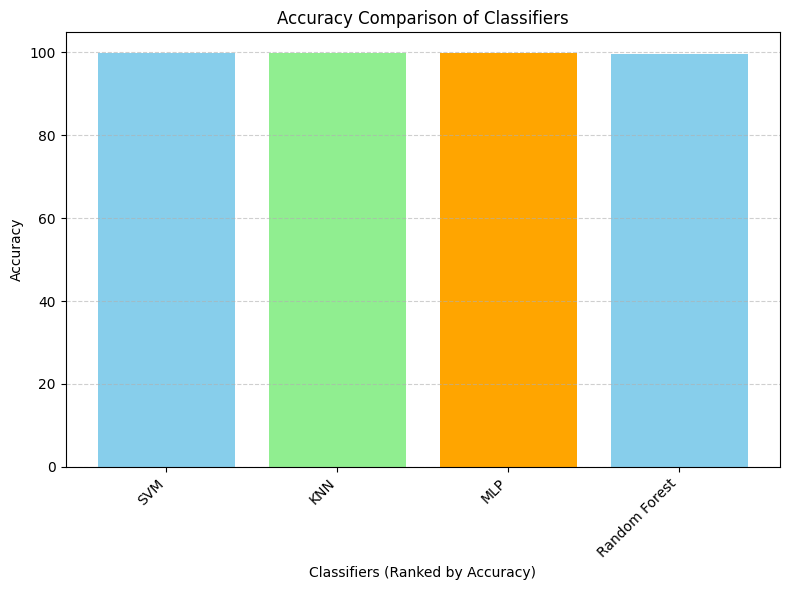

In [ ]:
# Comparision

classifiers = ('Random Forest', 'MLP', 'KNN', 'SVM')
y_pos = np.arange(len(classifiers))

accuracies = [rfacc, mlpacc, knnacc, svmacc]
# Sort together by accuracy (descending order)
sorted_data = sorted(zip(classifiers, accuracies), key=lambda x: x[1], reverse=True)
sorted_classifiers, sorted_accuracies = zip(*sorted_data)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(sorted_classifiers, sorted_accuracies, color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Classifiers (Ranked by Accuracy)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.xticks(rotation=45, ha='right')  # Rotate classifier names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for readability
plt.tight_layout()
plt.show()

## Prediction

### Function

### Sort list elements by numbers present in them

In [ ]:
# Sort list elements by numbers present in them
def sort_by_number(names):
  """Sorts a list of names by the numeric part in ascending order.

  Args:
      names: A list of alphanumeric strings.

  Returns:
      A new list with the names sorted by the numeric part.
  """

  def extract_number(name):
    """Extracts the numeric part from a name."""
    numbers = name.split('_')[1]
    return int(numbers) if numbers else 0

  return sorted(names, key=extract_number)

### load_flat

In [ ]:
def load_flat(img_path):
    img=Image.open(img_path)

    imgData = np.asarray(img)
    flat=imgData.flatten()
    flat=flat.reshape(1,-1)

    img_height_rows = 32
    img_width_cols = 32
    im_shape = (img_height_rows, img_width_cols, 1)
    flat = flat.reshape(flat.shape[0], *im_shape)
    flat = intermediate_layer_model.predict(flat)
    return flat

### evaluate

In [ ]:
def evaluate(model_list, path, label_encoder):
    results = {model:{'acc':0, 'pred_set':{}} for model in model_list}
    img_list = os.listdir(path)
    flat_list = [load_flat(os.path.join(path, img)) for img in img_list]
    label = '-'.join(os.path.join(path).split('_')[-2:])
    for model in model_list:
        true_labels = []
        predicted_labels = []
        count = 0
        for flat in flat_list:
            predicted_label = le.inverse_transform(model.predict(flat))[0]
            predicted_labels.append(predicted_label)
            true_labels.append(label)
            count += 1
        correct_predictions = sum(pred == true for pred, true in zip(predicted_labels, true_labels))
        accuracy = correct_predictions / count
        results[model]['acc'] = accuracy*100
        results[model]['pred_set'] = set(predicted_labels)

    return results

### Predictions on Full Data

In [ ]:
path_test = './drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Test_Full_Data/'

mdl_list = [fullDataRandomForestClassifier, fullDataMLPClassifier, fullDataKNNClassifier, fullDataSVMClassifier]

dir_f = sort_by_number(os.listdir(path_test))
total_res = {}
for char_f in dir_f:
    total_res['-'.join(char_f.split('_')[2:])] = evaluate(mdl_list, os.path.join(path_test, char_f), le)

In [ ]:
"""
{
    True Labels : {
        Classifier : {
            Accuracy : 0,
            Set of Predicted Labels : {}
        },
    },
}
"""
count = 0
for true_l in total_res.keys(): # total res keys = True Labels
    count += 1
    print(f"{count} ---> True Label : {true_l}\n")
    for clf_name in total_res[true_l].keys():   # True Label keys = Classifiers
        print(f"Classifier : {clf_name}")
        print("Accuracy : ", total_res[true_l][clf_name]['acc'])
        print("Predicted Labes Set : ", total_res[true_l][clf_name]['pred_set'])
        print()
    print(75*'+')

1 ---> True Label : ka-क

Classifier : RandomForestClassifier()
Accuracy :  93.66666666666667
Predicted Labes Set :  {'la-ल', 'daa-ड', 'jha-झ', 'ka-क', 'dha-ध', 'thaa-ठ', 'chha-छ', 'na-न', 'pha-फ'}

Classifier : MLPClassifier()
Accuracy :  96.0
Predicted Labes Set :  {'daa-ड', 'jha-झ', 'ka-क', 'ja-ज', 'thaa-ठ', 'chha-छ', 'pha-फ', 'wa-व'}

Classifier : KNeighborsClassifier()
Accuracy :  93.0
Predicted Labes Set :  {'daa-ड', 'jha-झ', 'ka-क', 'dha-ध', 'thaa-ठ', 'ha-ह', 'na-न', 'pha-फ', 'wa-व'}

Classifier : SVC(C=1, kernel='linear')
Accuracy :  96.0
Predicted Labes Set :  {'daa-ड', 'jha-झ', 'ka-क', 'thaa-ठ', 'na-न', 'pha-फ', 'wa-व'}

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2 ---> True Label : kha-ख

Classifier : RandomForestClassifier()
Accuracy :  94.33333333333334
Predicted Labes Set :  {'sha-श', 'daa-ड', 'gya-ज्ञ', 'kha-ख', 'ba-ब', 'gha-घ', 'bha-भ', 'sa-स'}

Classifier : MLPClassifier()
Accuracy :  95.33333333333334
Predicted Labes Set :  {'da-द', 's

# 2.

## Prediction on Cropped Data

In [ ]:
path_test = './drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Cropped_Images_For_Testing'

mdl_list = [fullDataRandomForestClassifier, fullDataMLPClassifier, fullDataKNNClassifier, fullDataSVMClassifier]

dir_f = sort_by_number(os.listdir(path_test))
total_res = {}
for char_f in dir_f:
    total_res['-'.join(char_f.split('_')[2:])] = evaluate(mdl_list, os.path.join(path_test, char_f), le)

In [ ]:
"""
{
    True Labels : {
        Classifier : {
            Accuracy : 0,
            Set of Predicted Labels : {}
        },
    },
}
"""
count = 0
for true_l in total_res.keys(): # total res keys = True Labels
    count += 1
    print(f"{count} ---> True Label : {true_l}\n")
    for clf_name in total_res[true_l].keys():   # True Label keys = Classifiers
        print(f"Classifier : {clf_name}")
        print("Accuracy : ", total_res[true_l][clf_name]['acc'])
        print("Predicted Labes Set : ", total_res[true_l][clf_name]['pred_set'])
        print()
    print(75*'+')

1 ---> True Label : ka-क

Classifier : RandomForestClassifier()
Accuracy :  0.5
Predicted Labes Set :  {'daa-ड', 'ksh-क्ष', 'tha-थ', 'dhaa-ढ', 'ja-ज', 'kha-ख', 'chha-छ', 'sha-श', 'nga-ङ', 'jha-झ', 'ta-ट', 'shha-ष', 'ka-क', 'dha-ध', 'adna-ण', 'sa-स', 'wa-व', 'ra-र', 'da-द', 'nya-ञ', 'tra-त्र', 'ga-ग', 'ha-ह', 'gha-घ', 'ba-ब', 'pha-फ', 'la-ल', 'gya-ज्ञ', 't-त', 'cha-च', 'thaa-ठ', 'bha-भ', 'pa-प'}

Classifier : MLPClassifier()
Accuracy :  1.0
Predicted Labes Set :  {'daa-ड', 'dhaa-ढ', 'tha-थ', 'ksh-क्ष', 'kha-ख', 'chha-छ', 'na-न', 'sha-श', 'jha-झ', 'ta-ट', 'shha-ष', 'ka-क', 'dha-ध', 'adna-ण', 'wa-व', 'ra-र', 'da-द', 'nya-ञ', 'tra-त्र', 'ga-ग', 'ba-ब', 'gha-घ', 'ha-ह', 'pha-फ', 'la-ल', 'pa-प', 'yaw-य', 'gya-ज्ञ', 't-त', 'cha-च', 'thaa-ठ', 'bha-भ', 'ma-म'}

Classifier : KNeighborsClassifier()
Accuracy :  1.0
Predicted Labes Set :  {'daa-ड', 'ksh-क्ष', 'kha-ख', 'chha-छ', 'sha-श', 'shha-ष', 'ka-क', 'dha-ध', 'adna-ण', 'wa-व', 'ra-र', 'da-द', 'tra-त्र', 'ga-ग', 'nya-ञ', 'ha-ह', 'ba-ब', 'pha-फ',

# 3.

## Load Image

In [ ]:
path = "./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Cropped_Images_For_Training"

folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]


for folder in folders:
    newPath = os.path.join(path, folder)
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = '-'.join(folderName.split("_")[2:])
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.jpg']
    for image in imageList:
        im = Image.open(os.path.join(newPath, image))
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
print("Size of the image matrix = ",np.size(imageMatrix))

Size of the image matrix =  18432000


## Pre-processing

In [ ]:
# Convert matrix to array
a = np.array(imageMatrix)
print("Before Normalization 'a' : \n", a, a.shape)

a = a.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
print("After Normalization 'a' : \n", a, a.shape)


# Separate the features and labels of the images
# Define variables
n_samples = len(a)
# X = a.reshape((n_samples,-1))
X = a.reshape(a.shape[0], a.shape[1])
Y = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',Y.shape)
print(Y)


# Transform categorical variables using Onehot encoding
le=preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)
Y=to_categorical(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)
print('Train size = ',x_train.shape," ",y_train.shape)

img_height_rows = 32
img_width_cols = 32

im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

Before Normalization 'a' : 
 [[  0   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  0   0   0 ...   1   2   2]
 ...
 [  0   0 253 ...   0   0   0]
 [  2   3   2 ...   0   0   0]
 [  0   6   6 ...   0   0   0]] (18000, 1024)
After Normalization 'a' : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01176471 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00392157 0.00784314 0.00784314]
 ...
 [0.         0.         0.99215686 ... 0.         0.         0.        ]
 [0.00784314 0.01176471 0.00784314 ... 0.         0.         0.        ]
 [0.         0.02352941 0.02352941 ... 0.         0.         0.        ]] (18000, 1024)
Features size =  (18000, 1024)
Labels size =  (18000,)
['kha-ख' 'kha-ख' 'kha-ख' ... 'adna-ण' 'adna-ण' 'adna-ण']
Train size =  (14400, 1024)   (14400, 36)
(32, 32, 1)


## Model

In [ ]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'

# 11 layers

# L1
# ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation, name="L1Conv")
cnn.add(ip_conv_0)

# L2
# Add the next Convolutional+Activation layer
# ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_0_1 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation, name="L2Conv")
cnn.add(ip_conv_0_1)

# L3
# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L3MaxPool")
cnn.add(pool_0)

# L4
# ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation, name="L4Conv")
cnn.add(ip_conv_1)

# L5
# ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation, name="L5Conv")
cnn.add(ip_conv_1_1)

# L6
# pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L6MaxPool")
cnn.add(pool_1)

# L7
# ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_2 = Conv2D(filters=128, kernel_size=kernelSize, activation=ip_activation, name="L7Conv")
cnn.add(ip_conv_2)

# L8
# pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
pool_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L8MaxPool")
cnn.add(pool_2)

# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

# L9
flat_layer_0 = Flatten()
cnn.add(flat_layer_0)

# L10
# Now add the Dense layers
# h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
h_dense_0 = Dense(units=256, activation=ip_activation, kernel_initializer='uniform', name="L10Dense")
cnn.add(h_dense_0)

# L11
# Let's add one more before proceeding to the output layer
# h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
h_dense_1 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform', name="L11Dense")
cnn.add(h_dense_1)

# L12
n_classes = 36
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

opt = 'adam'
loss = 'categorical_crossentropy'
metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [ ]:
history = cnn.fit(x_train, y_train, batch_size=100, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
144/144 [==============================] - 49s 322ms/step - loss: 3.4552 - accuracy: 0.0618 - precision: 0.3333 - recall: 6.9444e-05 - val_loss: 3.1928 - val_accuracy: 0.1250 - val_precision: 0.6667 - val_recall: 0.0028
Epoch 2/25
144/144 [==============================] - 45s 311ms/step - loss: 2.8935 - accuracy: 0.1865 - precision: 0.6141 - recall: 0.0254 - val_loss: 2.6005 - val_accuracy: 0.2519 - val_precision: 0.6288 - val_recall: 0.0739
Epoch 3/25
144/144 [==============================] - 47s 327ms/step - loss: 2.3423 - accuracy: 0.3202 - precision: 0.7097 - recall: 0.1207 - val_loss: 2.2594 - val_accuracy: 0.3344 - val_precision: 0.6965 - val_recall: 0.1536
Epoch 4/25
144/144 [==============================] - 45s 310ms/step - loss: 1.9375 - accuracy: 0.4285 - precision: 0.7350 - recall: 0.2259 - val_loss: 1.9721 - val_accuracy: 0.4292 - val_precision: 0.7023 - val_recall: 0.2517
Epoch 5/25
144/144 [==============================] - 44s 306ms/step - loss: 1.6461 - ac

In [ ]:
cnn.history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

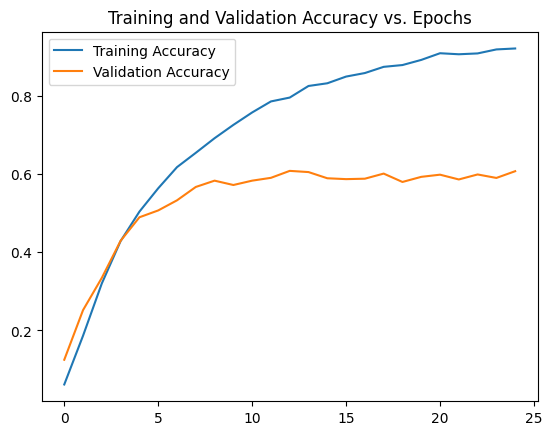

In [ ]:
# Plot the model accuracy over increasing epochs
plt.plot(cnn.history.history['accuracy'])
plt.plot(cnn.history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Training and Validation Accuracy vs. Epochs")
plt.show()

In [ ]:
# Display the accuracy of the model
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.69%


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1Conv (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 L2Conv (Conv2D)             (None, 28, 28, 32)        9248      
                                                                 
 L3MaxPool (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 L4Conv (Conv2D)             (None, 12, 12, 64)        18496     
                                                                 
 L5Conv (Conv2D)             (None, 10, 10, 64)        36928     
                                                                 
 L6MaxPool (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 L7Conv (Conv2D)             (None, 3, 3, 128)         7

## Save & Load Model

In [ ]:
cnn.save('./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/cnn_model_cropped_data_1.keras')

In [ ]:
from tensorflow.keras.models import load_model
# Load the Keras model
cnn = load_model('./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/cnn_model_cropped_data_1.keras')

## Extract the features from the CNN second last layer


In [ ]:
model = cnn
layer_name= 'L11Dense'
intermediate_layer_model = Model(inputs=cnn.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train)

# Use the features extracted from CNN to pass to the classifier for classification
x_train = intermediate_output

# Convert the target encoded back to pass on to the different classifiers
y1 = np.argmax(y_train, axis=1)
y1

450/450 [==============================] - 10s 23ms/step


array([32, 33, 29, ..., 21, 14,  7])

In [ ]:
# Split the data in train and test data before passing the features classifier for prediction
X_train, X_test, T_train, T_test = train_test_split(x_train, y1, test_size=0.3, random_state=25)

## Generic function to run the classifiers and predict accuracy

In [ ]:
# Create a generic function to run the classifiers and predict accuracy
from sklearn.metrics import confusion_matrix

def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
  """run chosen classifier and display results"""
  start_time = time.time()
  clfr.fit(x_train_data, y_train_data)
  y_pred = clfr.predict(x_test_data)
  print("Time taken for prediction = %f seconds" % (time.time() - start_time))

  print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
  acc = accuracy_score(y_test_data, y_pred) * 100
  print("acc=", acc)

  # Calculate confusion matrix
  cm = confusion_matrix(y_test_data, y_pred)

  # Print confusion matrix header (if provided)
  if matrix_header_str:
    print(matrix_header_str)

  # Print confusion matrix in a readable format
  print(cm)

  return y_pred, acc

## Applying the generic function

In [ ]:
# Pass the features to Random Forest Classifier for predictions
print('Random Forest Classifier starting ...')
croppedDataRandomForestClassifier = RandomForestClassifier()
y_pred,rfacc=genericClassifier(croppedDataRandomForestClassifier, X_train, T_train, X_test, T_test, "CNN-Random Forest Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to Multi-Layer Perceptron Classifier for predictions
print('Multi-Layer Perceptron Classifier starting ...')
croppedDataMLPClassifier = MLPClassifier()
y_pred,mlpacc=genericClassifier(croppedDataMLPClassifier, X_train, T_train, X_test, T_test, "CNN-Multi-Layer Perceptron Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to KNN Classifier for predictions
print('KNN Classifier starting ...')
croppedDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(croppedDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to SVM Classifier with RBF kernel for predictions
print('SVM classifier with RBF kernel starting ...')
croppedDataSVMClassifier = SVC(kernel='linear', C=1)
y_pred,svmacc=genericClassifier(croppedDataSVMClassifier, X_train, T_train, X_test, T_test, "CNN-SVM Accuracy: {0:0.1f}%", "Confusion matrix")

Random Forest Classifier starting ...
Time taken for prediction = 8.202760 seconds
CNN-Random Forest Accuracy: 80.3%
acc= 80.32407407407408
Confusion matrix
[[103   0   0 ...   0   1   0]
 [  0  94   0 ...   0   4   0]
 [  0   0  85 ...   1   0   0]
 ...
 [  0   4   0 ...  73   1   4]
 [  0  19   1 ...   3  73   3]
 [  3   0   3 ...   1   1  84]]
Multi-Layer Perceptron Classifier starting ...
Time taken for prediction = 18.332967 seconds
CNN-Multi-Layer Perceptron Accuracy: 90.5%
acc= 90.46296296296296
Confusion matrix
[[106   0   0 ...   0   1   0]
 [  0 105   0 ...   1   2   0]
 [  0   1 101 ...   0   0   0]
 ...
 [  0   3   0 ...  89   1   2]
 [  0   8   0 ...   3 110   0]
 [  0   0   0 ...   1   0 121]]
KNN Classifier starting ...
Time taken for prediction = 0.840272 seconds
CNN-KNN Accuracy: 75.9%
acc= 75.87962962962963
Confusion matrix
[[96  0  0 ...  0  0  1]
 [ 0 93  0 ...  0  3  2]
 [ 6  0 81 ...  2  1  0]
 ...
 [ 2  9  0 ... 68  1  1]
 [ 0 19  0 ...  2 73  3]
 [ 5  5  3 ...  

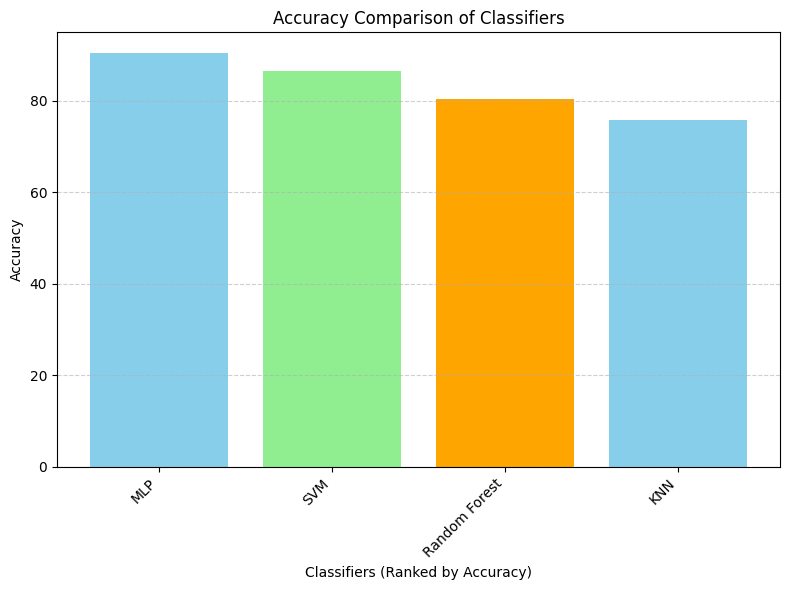

In [ ]:
# Comparision

classifiers = ('Random Forest', 'MLP', 'KNN', 'SVM')
y_pos = np.arange(len(classifiers))

accuracies = [rfacc, mlpacc, knnacc, svmacc]
# Sort together by accuracy (descending order)
sorted_data = sorted(zip(classifiers, accuracies), key=lambda x: x[1], reverse=True)
sorted_classifiers, sorted_accuracies = zip(*sorted_data)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(sorted_classifiers, sorted_accuracies, color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Classifiers (Ranked by Accuracy)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.xticks(rotation=45, ha='right')  # Rotate classifier names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for readability
plt.tight_layout()
plt.show()

## Prediction

### Function

### Sort list elements by numbers present in them

In [ ]:
# Sort list elements by numbers present in them
def sort_by_number(names):
  """Sorts a list of names by the numeric part in ascending order.

  Args:
      names: A list of alphanumeric strings.

  Returns:
      A new list with the names sorted by the numeric part.
  """

  def extract_number(name):
    """Extracts the numeric part from a name."""
    numbers = name.split('_')[1]
    return int(numbers) if numbers else 0

  return sorted(names, key=extract_number)

### load_flat

In [ ]:
def load_flat(img_path):
    img=Image.open(img_path)

    imgData = np.asarray(img)
    flat=imgData.flatten()
    flat=flat.reshape(1,-1)

    img_height_rows = 32
    img_width_cols = 32
    im_shape = (img_height_rows, img_width_cols, 1)
    flat = flat.reshape(flat.shape[0], *im_shape)
    flat = intermediate_layer_model.predict(flat)
    return flat

### evaluate

In [ ]:
def evaluate(model_list, path, label_encoder):
    results = {model:{'acc':0, 'pred_set':{}} for model in model_list}
    img_list = os.listdir(path)
    flat_list = [load_flat(os.path.join(path, img)) for img in img_list]
    label = '-'.join(os.path.join(path).split('_')[-2:])
    for model in model_list:
        true_labels = []
        predicted_labels = []
        count = 0
        for flat in flat_list:
            predicted_label = le.inverse_transform(model.predict(flat))[0]
            predicted_labels.append(predicted_label)
            true_labels.append(label)
            count += 1
        correct_predictions = sum(pred == true for pred, true in zip(predicted_labels, true_labels))
        accuracy = correct_predictions / count
        results[model]['acc'] = accuracy*100
        results[model]['pred_set'] = set(predicted_labels)

    return results

### Make Predictions

In [ ]:
path_test = './drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Test_Full_Data/'

mdl_list = [croppedDataRandomForestClassifier, croppedDataMLPClassifier, croppedDataKNNClassifier, croppedDataSVMClassifier]

dir_f = sort_by_number(os.listdir(path_test))
total_res = {}
for char_f in dir_f:
    total_res['-'.join(char_f.split('_')[2:])] = evaluate(mdl_list, os.path.join(path_test, char_f), le)

In [ ]:
"""
{
    True Labels : {
        Classifier : {
            Accuracy : 0,
            Set of Predicted Labels : {}
        },
    },
}
"""
count = 0
for true_l in total_res.keys(): # total res keys = True Labels
    count += 1
    print(f"{count} ---> True Label : {true_l}\n")
    for clf_name in total_res[true_l].keys():   # True Label keys = Classifiers
        print(f"Classifier : {clf_name}")
        print("Accuracy : ", total_res[true_l][clf_name]['acc'])
        print("Predicted Labes Set : ", total_res[true_l][clf_name]['pred_set'])
        print()
    print(75*'+')

1 ---> True Label : ka-क

Classifier : RandomForestClassifier()
Accuracy :  4.666666666666667
Predicted Labes Set :  {'tra-त्र', 'jha-झ', 'sha-श', 'la-ल', 'kha-ख', 'chha-छ', 'na-न', 'dhaa-ढ', 'pha-फ', 'ka-क', 'dha-ध', 'ja-ज', 'tha-थ', 'sa-स', 'daa-ड', 'thaa-ठ', 'gha-घ', 'ma-म', 'ksh-क्ष', 'ha-ह', 'adna-ण', 'ba-ब', 'nya-ञ', 'bha-भ'}

Classifier : MLPClassifier()
Accuracy :  0.6666666666666667
Predicted Labes Set :  {'tra-त्र', 'jha-झ', 'la-ल', 'kha-ख', 'chha-छ', 'na-न', 'pha-फ', 'ka-क', 'dha-ध', 'ja-ज', 'tha-थ', 'da-द', 'sa-स', 'yaw-य', 'thaa-ठ', 'gha-घ', 'shha-ष', 'wa-व', 'ma-म', 'ksh-क्ष', 'ba-ब', 'pa-प', 'ra-र', 'nya-ञ', 'bha-भ'}

Classifier : KNeighborsClassifier()
Accuracy :  5.666666666666666
Predicted Labes Set :  {'jha-झ', 'la-ल', 'sha-श', 'kha-ख', 'chha-छ', 'na-न', 'pha-फ', 'ka-क', 'dha-ध', 'ja-ज', 'tha-थ', 'sa-स', 'thaa-ठ', 'ga-ग', 'ma-म', 'ksh-क्ष', 'adna-ण', 'ba-ब', 'pa-प', 'nya-ञ', 'bha-भ'}

Classifier : SVC(C=1, kernel='linear')
Accuracy :  4.0
Predicted Labes Set :  {'tra

## Testing

SVM classifier with RBF kernel starting ...
Time taken for prediction = 3.663340 seconds
CNN-SVM Accuracy: 99.8%
acc= 99.82638888888889
Confusion matrix
[[243   0   0 ...   0   0   0]
 [  0 237   0 ...   0   0   0]
 [  0   0 241 ...   0   0   0]
 ...
 [  0   0   0 ... 240   0   0]
 [  0   1   0 ...   0 265   0]
 [  0   0   0 ...   0   0 222]]


1/1 [==============================] - 0s 28ms/step


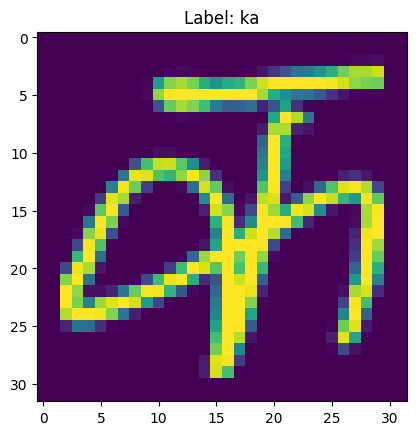

In [ ]:
img=Image.open('./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Test_Full_Data/character_1_ka_क/1345.png')
img=img.convert('L')
img=img.resize((32,32))
imgData = np.array(img)
plt.title("Label: ka")
plt.imshow(imgData)
flat=imgData.flatten()
flat=flat.reshape(1,-1)

img_height_rows = 32
img_width_cols = 32
im_shape = (img_height_rows, img_width_cols, 1)
flat = flat.reshape(flat.shape[0], *im_shape)
flat = intermediate_layer_model.predict(flat)


In [ ]:
le.inverse_transform(croppedDataSVMClassifier.predict(flat))[0]

'ka-क'

# 4.

## Load Image

In [ ]:
path = "./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Train_Full_&_Cropped_Data"

folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]


for folder in folders:
    newPath = os.path.join(path, folder)
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = '-'.join(folderName.split("_")[2:])
    imageList= [f for f in os.listdir(newPath)]
    for image in imageList:
        im = Image.open(os.path.join(newPath, image))
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
print("Size of the image matrix = ",np.size(imageMatrix))

Size of the image matrix =  22118400


## Pre-processing

In [ ]:
# Convert matrix to array
a = np.array(imageMatrix)
print("Before Normalization 'a' : \n", a, a.shape)

a = a.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
print("After Normalization 'a' : \n", a, a.shape)


# Separate the features and labels of the images
# Define variables
n_samples = len(a)
# X = a.reshape((n_samples,-1))
X = a.reshape(a.shape[0], a.shape[1])
Y = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',Y.shape)
print(Y)


# Transform categorical variables using Onehot encoding
le=preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)
Y=to_categorical(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=25)
print('Train size = ',x_train.shape," ",y_train.shape)

img_height_rows = 32
img_width_cols = 32

im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

Before Normalization 'a' : 
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  2   0 255 ...   0   0   0]
 [  0   1   3 ...   0   1   4]
 [  1   1   1 ...   0   0   0]] (21600, 1024)
After Normalization 'a' : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00784314 0.         1.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.01176471 ... 0.         0.00392157 0.01568628]
 [0.00392157 0.00392157 0.00392157 ... 0.         0.         0.        ]] (21600, 1024)
Features size =  (21600, 1024)
Labels size =  (21600,)
['kha-ख' 'kha-ख' 'kha-ख' ... 'adna-ण' 'adna-ण' 'adna-ण']
Train size =  (17280, 1024)   (17280, 36)
(32, 32, 1)


## Model

In [ ]:
cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'

# 11 layers

# L1
# ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation, name="L1Conv")
cnn.add(ip_conv_0)

# L2
# Add the next Convolutional+Activation layer
# ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_0_1 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation, name="L2Conv")
cnn.add(ip_conv_0_1)

# L3
# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L3MaxPool")
cnn.add(pool_0)

# L4
# ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation, name="L4Conv")
cnn.add(ip_conv_1)

# L5
# ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation, name="L5Conv")
cnn.add(ip_conv_1_1)

# L6
# pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L6MaxPool")
cnn.add(pool_1)

# L7
# ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
ip_conv_2 = Conv2D(filters=128, kernel_size=kernelSize, activation=ip_activation, name="L7Conv")
cnn.add(ip_conv_2)

# L8
# pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
pool_2 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same", name="L8MaxPool")
cnn.add(pool_2)

# Let's deactivate around 20% of neurons randomly for training
# drop_layer_0 = Dropout(0.2)
# cnn.add(drop_layer_0)

# L9
flat_layer_0 = Flatten()
cnn.add(flat_layer_0)

# L10
# Now add the Dense layers
# h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
h_dense_0 = Dense(units=256, activation=ip_activation, kernel_initializer='uniform', name="L10Dense")
cnn.add(h_dense_0)

# L11
# Let's add one more before proceeding to the output layer
# h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
h_dense_1 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform', name="L11Dense")
cnn.add(h_dense_1)

# L12
n_classes = 36
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

opt = 'adam'
loss = 'categorical_crossentropy'
metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [ ]:
history = cnn.fit(x_train, y_train, batch_size=100, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
173/173 [==============================] - 75s 418ms/step - loss: 3.0568 - accuracy: 0.1573 - precision: 0.7441 - recall: 0.0308 - val_loss: 2.3097 - val_accuracy: 0.3440 - val_precision: 0.7327 - val_recall: 0.1516
Epoch 2/25
173/173 [==============================] - 68s 394ms/step - loss: 1.8485 - accuracy: 0.4672 - precision: 0.8021 - recall: 0.2913 - val_loss: 1.5938 - val_accuracy: 0.5382 - val_precision: 0.8447 - val_recall: 0.3891
Epoch 3/25
173/173 [==============================] - 74s 427ms/step - loss: 1.3417 - accuracy: 0.6002 - precision: 0.8347 - recall: 0.4693 - val_loss: 1.3207 - val_accuracy: 0.6081 - val_precision: 0.8352 - val_recall: 0.4903
Epoch 4/25
173/173 [==============================] - 69s 398ms/step - loss: 1.0456 - accuracy: 0.6819 - precision: 0.8589 - recall: 0.5789 - val_loss: 1.0859 - val_accuracy: 0.6819 - val_precision: 0.8497 - val_recall: 0.5785
Epoch 5/25
173/173 [==============================] - 73s 423ms/step - loss: 0.8374 - accura

In [ ]:
cnn.history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

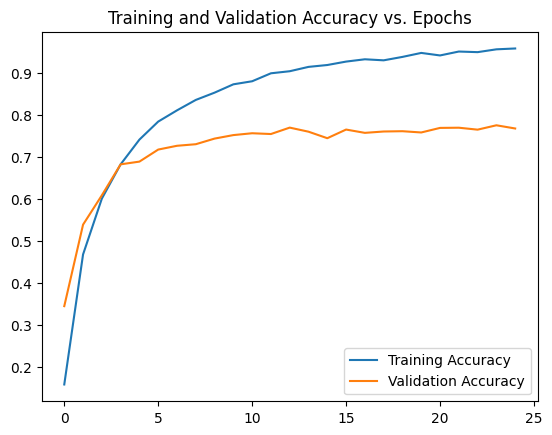

In [ ]:
# Plot the model accuracy over increasing epochs
plt.plot(cnn.history.history['accuracy'])
plt.plot(cnn.history.history['val_accuracy'])
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Training and Validation Accuracy vs. Epochs")
plt.show()

In [ ]:
# Display the accuracy of the model
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.74%


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1Conv (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 L2Conv (Conv2D)             (None, 28, 28, 32)        9248      
                                                                 
 L3MaxPool (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 L4Conv (Conv2D)             (None, 12, 12, 64)        18496     
                                                                 
 L5Conv (Conv2D)             (None, 10, 10, 64)        36928     
                                                                 
 L6MaxPool (MaxPooling2D)    (None, 5, 5, 64)          0         
                                                                 
 L7Conv (Conv2D)             (None, 3, 3, 128)         7

## Save & Load Model

In [ ]:
cnn.save('./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/cnn_model_full_&_cropped_data_1.keras')

In [ ]:
from tensorflow.keras.models import load_model
# Load the Keras model
cnn = load_model('./drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/cnn_model_full_&_cropped_data_1.keras')

## Extract the features from the CNN second last layer


In [ ]:
model = cnn
layer_name= 'L11Dense'
intermediate_layer_model = Model(inputs=cnn.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(x_train)

# Use the features extracted from CNN to pass to the classifier for classification
x_train = intermediate_output

# Convert the target encoded back to pass on to the different classifiers
y1 = np.argmax(y_train, axis=1)
y1

540/540 [==============================] - 18s 32ms/step


array([24, 33, 34, ..., 10, 13, 29])

In [ ]:
# Split the data in train and test data before passing the features classifier for prediction
X_train, X_test, T_train, T_test = train_test_split(x_train, y1, test_size=0.3, random_state=25)

## Generic function to run the classifiers and predict accuracy

In [ ]:
# Create a generic function to run the classifiers and predict accuracy
from sklearn.metrics import confusion_matrix

def genericClassifier(clfr, x_train_data, y_train_data, x_test_data, y_test_data, acc_str, matrix_header_str):
  """run chosen classifier and display results"""
  start_time = time.time()
  clfr.fit(x_train_data, y_train_data)
  y_pred = clfr.predict(x_test_data)
  print("Time taken for prediction = %f seconds" % (time.time() - start_time))

  print(acc_str.format(accuracy_score(y_test_data, y_pred) * 100))
  acc = accuracy_score(y_test_data, y_pred) * 100
  print("acc=", acc)

  # Calculate confusion matrix
  cm = confusion_matrix(y_test_data, y_pred)

  # Print confusion matrix header (if provided)
  if matrix_header_str:
    print(matrix_header_str)

  # Print confusion matrix in a readable format
  print(cm)

  return y_pred, acc

## Applying the generic function

In [ ]:
# Pass the features to Random Forest Classifier for predictions
print('Random Forest Classifier starting ...')
fullcroppedDataRandomForestClassifier = RandomForestClassifier()
y_pred,rfacc=genericClassifier(fullcroppedDataRandomForestClassifier, X_train, T_train, X_test, T_test, "CNN-Random Forest Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to Multi-Layer Perceptron Classifier for predictions
print('Multi-Layer Perceptron Classifier starting ...')
fullcroppedDataMLPClassifier = MLPClassifier()
y_pred,mlpacc=genericClassifier(fullcroppedDataMLPClassifier, X_train, T_train, X_test, T_test, "CNN-Multi-Layer Perceptron Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to KNN Classifier for predictions
print('KNN Classifier starting ...')
fullcroppedDataKNNClassifier = KNeighborsClassifier()
y_pred,knnacc=genericClassifier(fullcroppedDataKNNClassifier, X_train, T_train, X_test, T_test, "CNN-KNN Accuracy: {0:0.1f}%", "Confusion matrix")

# Pass the features to SVM Classifier with RBF kernel for predictions
print('SVM classifier with RBF kernel starting ...')
fullcroppedDataSVMClassifier = SVC(kernel='linear', C=1)
y_pred,svmacc=genericClassifier(fullcroppedDataSVMClassifier, X_train, T_train, X_test, T_test, "CNN-SVM Accuracy: {0:0.1f}%", "Confusion matrix")

Random Forest Classifier starting ...
Time taken for prediction = 9.604339 seconds
CNN-Random Forest Accuracy: 90.5%
acc= 90.50925925925925
Confusion matrix
[[150   0   0 ...   0   0   0]
 [  1 112   0 ...   2   7   0]
 [  2   0 124 ...   1   0   0]
 ...
 [  1   5   1 ... 141   0   1]
 [  0   2   0 ...   2 111   2]
 [  1   1   0 ...   1   1 142]]
Multi-Layer Perceptron Classifier starting ...
Time taken for prediction = 45.558978 seconds
CNN-Multi-Layer Perceptron Accuracy: 94.8%
acc= 94.81095679012346
Confusion matrix
[[153   0   0 ...   0   0   0]
 [  0 127   0 ...   0   3   0]
 [  0   1 133 ...   0   0   1]
 ...
 [  0   2   1 ... 148   1   0]
 [  0   2   0 ...   2 117   1]
 [  0   0   0 ...   1   3 146]]
KNN Classifier starting ...
Time taken for prediction = 1.247852 seconds
CNN-KNN Accuracy: 88.7%
acc= 88.69598765432099
Confusion matrix
[[146   0   0 ...   0   0   0]
 [  0 115   2 ...   0   3   0]
 [  2   1 125 ...   0   1   0]
 ...
 [  0   4   0 ... 132   4   2]
 [  0   5   0 ...

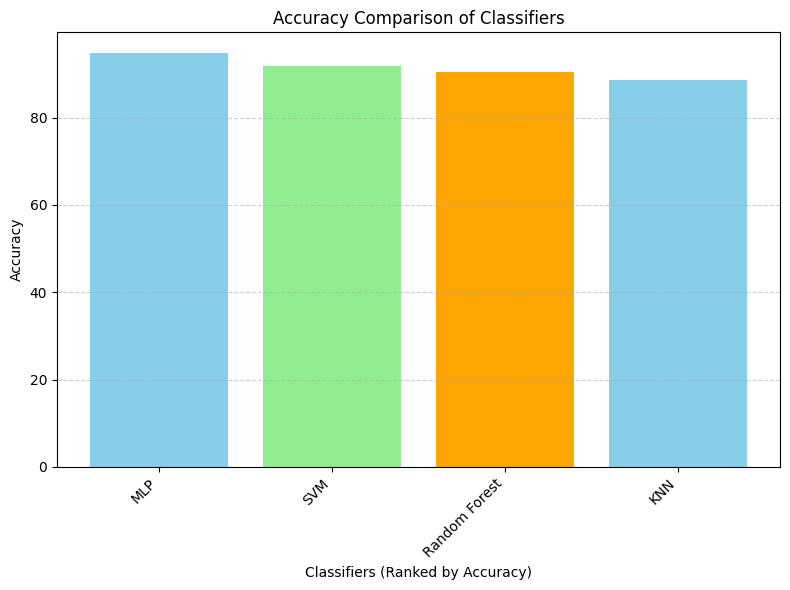

In [ ]:
# Comparision

classifiers = ('Random Forest', 'MLP', 'KNN', 'SVM')
y_pos = np.arange(len(classifiers))

accuracies = [rfacc, mlpacc, knnacc, svmacc]
# Sort together by accuracy (descending order)
sorted_data = sorted(zip(classifiers, accuracies), key=lambda x: x[1], reverse=True)
sorted_classifiers, sorted_accuracies = zip(*sorted_data)

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(sorted_classifiers, sorted_accuracies, color=['skyblue', 'lightgreen', 'orange'])
plt.xlabel('Classifiers (Ranked by Accuracy)')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classifiers')
plt.xticks(rotation=45, ha='right')  # Rotate classifier names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for readability
plt.tight_layout()
plt.show()

## Prediction

### Function

### Sort list elements by numbers present in them

In [ ]:
# Sort list elements by numbers present in them
def sort_by_number(names):
  """Sorts a list of names by the numeric part in ascending order.

  Args:
      names: A list of alphanumeric strings.

  Returns:
      A new list with the names sorted by the numeric part.
  """

  def extract_number(name):
    """Extracts the numeric part from a name."""
    numbers = name.split('_')[1]
    return int(numbers) if numbers else 0

  return sorted(names, key=extract_number)

### load_flat

In [ ]:
def load_flat(img_path):
    img=Image.open(img_path)

    imgData = np.asarray(img)
    flat=imgData.flatten()
    flat=flat.reshape(1,-1)

    img_height_rows = 32
    img_width_cols = 32
    im_shape = (img_height_rows, img_width_cols, 1)
    flat = flat.reshape(flat.shape[0], *im_shape)
    flat = intermediate_layer_model.predict(flat)
    return flat

### evaluate

In [ ]:
def evaluate(model_list, path, label_encoder):
    results = {model:{'acc':0, 'pred_set':{}} for model in model_list}
    img_list = os.listdir(path)
    flat_list = [load_flat(os.path.join(path, img)) for img in img_list]
    label = '-'.join(os.path.join(path).split('_')[-2:])
    for model in model_list:
        true_labels = []
        predicted_labels = []
        count = 0
        for flat in flat_list:
            predicted_label = le.inverse_transform(model.predict(flat))[0]
            predicted_labels.append(predicted_label)
            true_labels.append(label)
            count += 1
        correct_predictions = sum(pred == true for pred, true in zip(predicted_labels, true_labels))
        accuracy = correct_predictions / count
        results[model]['acc'] = accuracy*100
        results[model]['pred_set'] = set(predicted_labels)

    return results

### Predictions on Full Data

In [ ]:
path_test = './drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Test_Full_Data/'

mdl_list = [fullcroppedDataRandomForestClassifier, fullcroppedDataMLPClassifier, fullcroppedDataKNNClassifier, fullcroppedDataSVMClassifier]

dir_f = sort_by_number(os.listdir(path_test))
total_res = {}
for char_f in dir_f:
    total_res['-'.join(char_f.split('_')[2:])] = evaluate(mdl_list, os.path.join(path_test, char_f), le)

In [ ]:
"""
{
    True Labels : {
        Classifier : {
            Accuracy : 0,
            Set of Predicted Labels : {}
        },
    },
}
"""
count = 0
for true_l in total_res.keys(): # total res keys = True Labels
    count += 1
    print(f"{count} ---> True Label : {true_l}\n")
    for clf_name in total_res[true_l].keys():   # True Label keys = Classifiers
        print(f"Classifier : {clf_name}")
        print("Accuracy : ", total_res[true_l][clf_name]['acc'])
        print("Predicted Labes Set : ", total_res[true_l][clf_name]['pred_set'])
        print()
    print(75*'+')

1 ---> True Label : ka-क

Classifier : RandomForestClassifier()
Accuracy :  85.33333333333334
Predicted Labes Set :  {'thaa-ठ', 'kha-ख', 'ma-म', 'tra-त्र', 'bha-भ', 'ka-क', 'ba-ब', 'jha-झ', 'na-न', 'pha-फ', 'dhaa-ढ', 'nga-ङ', 'ksh-क्ष', 'chha-छ', 'daa-ड', 'ha-ह'}

Classifier : MLPClassifier()
Accuracy :  83.0
Predicted Labes Set :  {'thaa-ठ', 'wa-व', 'ma-म', 'yaw-य', 'tra-त्र', 'bha-भ', 'ka-क', 'ba-ब', 'nya-ञ', 'jha-झ', 'pha-फ', 'dhaa-ढ', 'na-न', 'ksh-क्ष', 'tha-थ', 'ha-ह'}

Classifier : KNeighborsClassifier()
Accuracy :  85.66666666666667
Predicted Labes Set :  {'thaa-ठ', 'ba-ब', 'bha-भ', 'ka-क', 'jha-झ', 'pha-फ', 'na-न', 'nga-ङ', 'ksh-क्ष', 'daa-ड', 'ha-ह'}

Classifier : SVC(C=1, kernel='linear')
Accuracy :  88.33333333333333
Predicted Labes Set :  {'thaa-ठ', 'kha-ख', 'wa-व', 'ba-ब', 'bha-भ', 'ka-क', 'tra-त्र', 'jha-झ', 'pha-फ', 'dhaa-ढ', 'gha-घ'}

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2 ---> True Label : kha-ख

Classifier : RandomForestClassifie

## Prediction on Cropped Data

In [ ]:
path_test = './drive/MyDrive/_PROJECT_WORK_/Devanagari Character Recognition/data/Cropped_Images_For_Testing'

mdl_list = [fullcroppedDataRandomForestClassifier, fullcroppedDataMLPClassifier, fullcroppedDataKNNClassifier, fullcroppedDataSVMClassifier]

dir_f = sort_by_number(os.listdir(path_test))
total_res = {}
for char_f in dir_f:
    total_res['-'.join(char_f.split('_')[2:])] = evaluate(mdl_list, os.path.join(path_test, char_f), le)

In [ ]:
"""
{
    True Labels : {
        Classifier : {
            Accuracy : 0,
            Set of Predicted Labels : {}
        },
    },
}
"""
count = 0
for true_l in total_res.keys(): # total res keys = True Labels
    count += 1
    print(f"{count} ---> True Label : {true_l}\n")
    for clf_name in total_res[true_l].keys():   # True Label keys = Classifiers
        print(f"Classifier : {clf_name}")
        print("Accuracy : ", total_res[true_l][clf_name]['acc'])
        print("Predicted Labes Set : ", total_res[true_l][clf_name]['pred_set'])
        print()
    print(75*'+')

1 ---> True Label : ka-क

Classifier : RandomForestClassifier()
Accuracy :  28.000000000000004
Predicted Labes Set :  {'sha-श', 'ma-म', 'bha-भ', 'dha-ध', 'la-ल', 'ja-ज', 'wa-व', 'ba-ब', 'na-न', 'ksh-क्ष', 'gha-घ', 'chha-छ', 'tra-त्र', 'nya-ञ', 't-त', 'pha-फ', 'shha-ष', 'da-द', 'tha-थ', 'ha-ह', 'thaa-ठ', 'kha-ख', 'yaw-य', 'ka-क', 'cha-च', 'jha-झ', 'dhaa-ढ', 'ra-र', 'nga-ङ', 'daa-ड'}

Classifier : MLPClassifier()
Accuracy :  26.0
Predicted Labes Set :  {'sha-श', 'ma-म', 'bha-भ', 'dha-ध', 'ja-ज', 'wa-व', 'ga-ग', 'ba-ब', 'na-न', 'ksh-क्ष', 'gha-घ', 'chha-छ', 'ta-ट', 'tra-त्र', 'nya-ञ', 't-त', 'pha-फ', 'shha-ष', 'tha-थ', 'da-द', 'thaa-ठ', 'yaw-य', 'kha-ख', 'ka-क', 'cha-च', 'jha-झ', 'dhaa-ढ', 'nga-ङ', 'daa-ड'}

Classifier : KNeighborsClassifier()
Accuracy :  22.0
Predicted Labes Set :  {'sha-श', 'bha-भ', 'la-ल', 'gya-ज्ञ', 'ba-ब', 'na-न', 'ksh-क्ष', 'chha-छ', 'tra-त्र', 'nya-ञ', 'pha-फ', 'shha-ष', 'tha-थ', 'ha-ह', 'thaa-ठ', 'yaw-य', 'ka-क', 'jha-झ', 'dhaa-ढ', 'nga-ङ', 'daa-ड', 'adna-ण'}

Cla